# Лабораторная работа № 5
## Сети с обратными связями

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import neurolab as nl
import numpy as np
import numpy.matlib
from neupy import algorithms
from scipy.spatial import distance
import pylab as pl
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

### Задание №1

Использовать *сеть Элмана* для распознавания динамических образов.

In [3]:
p1_k = np.linspace(0, 1, int(1 / 0.025), endpoint=True)

# main signal
p1 = np.sin(4 * np.pi * p1_k)

t1 = np.ones(len(p1_k)) * (-1)

p2_k = np.linspace(1.56, 3.12, int(1.79 / 0.025), endpoint=True)

# predict signal
p2 = np.sin(np.sin(p2_k) * p2_k * p2_k * p2_k - 10)

t2 = np.ones(len(p2_k))

# delay
R = np.array([0, 1, 5])

In [4]:
p2 = p2.reshape(1, p2.shape[0])
t2 = t2.reshape(1, t2.shape[0])

In [5]:
P = np.concatenate((numpy.matlib.repmat(p1, 1, R[0]), p2,
                    numpy.matlib.repmat(p1, 1, R[1]), p2,
                    numpy.matlib.repmat(p1, 1, R[2]), p2), axis=1).reshape(-1, 1)

T = np.concatenate((numpy.matlib.repmat(t1, 1, R[0]), t2,
                    numpy.matlib.repmat(t1, 1, R[1]), t2,
                    numpy.matlib.repmat(t1, 1, R[2]), t2), axis=1).reshape(-1, 1)

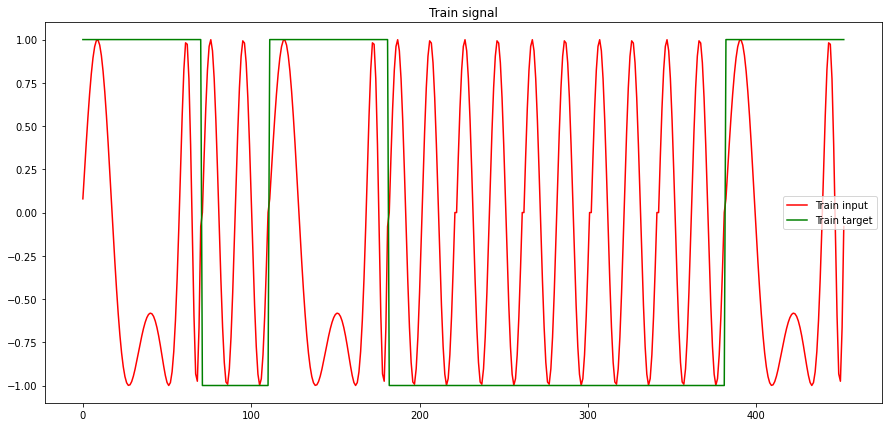

In [6]:
plt.figure(figsize=(15, 7))
plt.plot(P.reshape(P.shape[0]), color='red')
plt.plot(T.reshape(T.shape[0]), color='green')
plt.legend(['Train input', 'Train target'])
plt.title("Train signal")
plt.show()

In [7]:
net = nl.net.newelm([[-10, 10]], [8, 1], [nl.trans.TanSig(), nl.trans.TanSig()])
# net.layers[0].np['w'][:] = 1 # set weight for all input neurons to 1
net.layers[0].np['b'][:] = 0 # set bias for all input neurons to 0
net.init()

In [8]:
# Train network, error - MSE
# error = net.train(P, T, epochs=5000, show=50, goal=0.0001, )
error = nl.train.train_gdx(net, P, T, epochs=1000, show=100, goal=0.0001,)

Epoch: 100; Error: 0.9584469911705652;
Epoch: 200; Error: 0.6052169173505229;
Epoch: 300; Error: 0.6263785041192863;
Epoch: 400; Error: 0.5917927988562998;
Epoch: 500; Error: 0.5941057926843958;
Epoch: 600; Error: 0.5918183948911149;
Epoch: 700; Error: 0.592177915427887;
Epoch: 800; Error: 0.5950107592187776;
Epoch: 900; Error: 0.5902019858100227;
Epoch: 1000; Error: 0.5910924475771474;
The maximum number of train epochs is reached


In [9]:
# Compute output
output = net.sim(P)

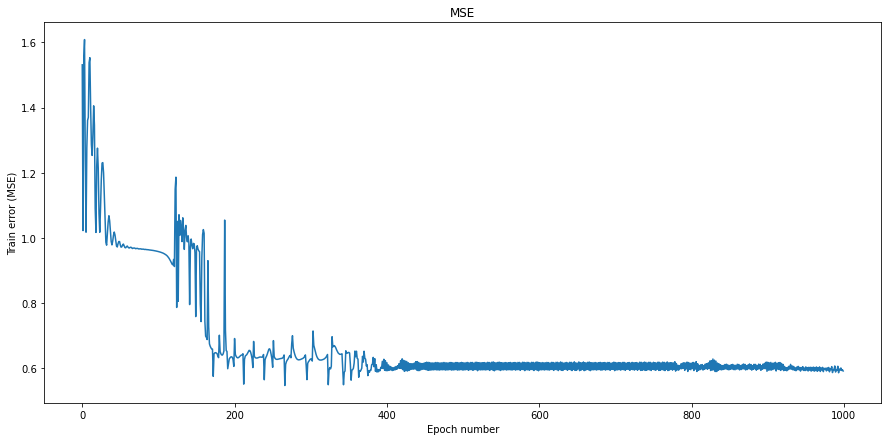

In [10]:
plt.figure(figsize=(15, 7))
plt.plot(error[::])
plt.xlabel('Epoch number')
plt.ylabel('Train error (MSE)')
plt.title("MSE")
plt.show()

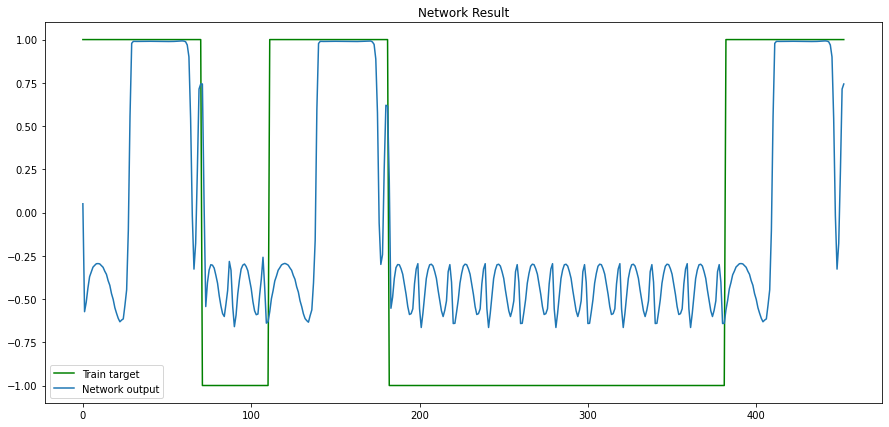

In [11]:
plt.figure(figsize=(15, 7))
plt.plot(T.reshape(T.shape[0]), color='green')
plt.plot(output.reshape(output.shape[0]))
plt.legend(['Train target', 'Network output'])
plt.title("Network Result")
plt.show()

Предсказанные значения:

In [12]:
output[output >= 0] = 1.0
output[output < 0] = -1.0

MSE = mean_squared_error(T, output)
print('MSE = {}'.format(MSE))
print('RMSE = {}'.format(np.sqrt(MSE)))

MSE = 0.8388520971302428
RMSE = 0.9158886925441556


In [13]:
p1_k = np.linspace(0, 1, int(1 / 0.025), endpoint=True)

# main signal
p1 = np.sin(4 * np.pi * p1_k)

t1 = np.ones(len(p1_k)) * (-1)


p2_k = np.linspace(2.47, 4.26, int(1.79 / 0.025), endpoint=True)

# predict signal
p2 = np.cos(np.cos(p2_k) * p2_k * p2_k)

t2 = np.ones(len(p2_k))

# delay
R = np.array([0, 4, 9])

In [14]:
p2 = p2.reshape(1, p2.shape[0])
t2 = t2.reshape(1, t2.shape[0])

P2 = np.concatenate((numpy.matlib.repmat(p1, 1, R[0]), p2,
                    numpy.matlib.repmat(p1, 1, R[1]), p2,
                    numpy.matlib.repmat(p1, 1, R[2]), p2), axis=1).reshape(-1, 1)

T2 = np.concatenate((numpy.matlib.repmat(t1, 1, R[0]), t2,
                    numpy.matlib.repmat(t1, 1, R[1]), t2,
                    numpy.matlib.repmat(t1, 1, R[2]), t2), axis=1).reshape(-1, 1)

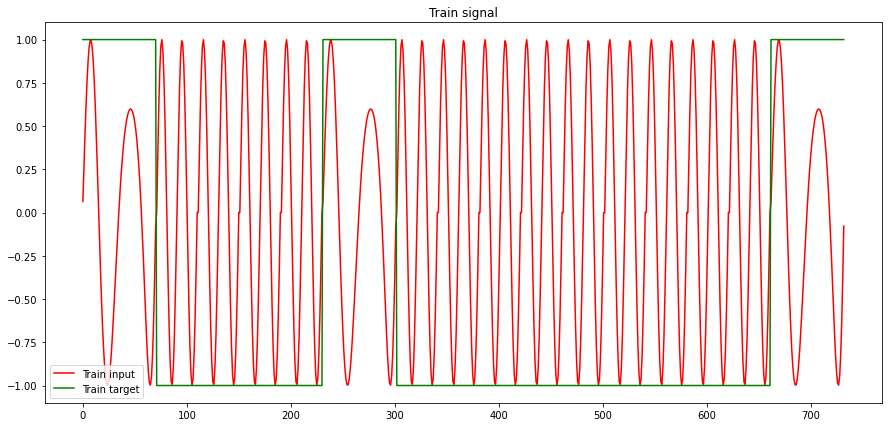

In [15]:
plt.figure(figsize=(15, 7))
plt.plot(P2.reshape(P2.shape[0]), color='red')
plt.plot(T2.reshape(T2.shape[0]), color='green')
plt.legend(['Train input', 'Train target'])
plt.title("Train signal")
plt.show()

In [16]:
# Network output
output2 = net.sim(P2)

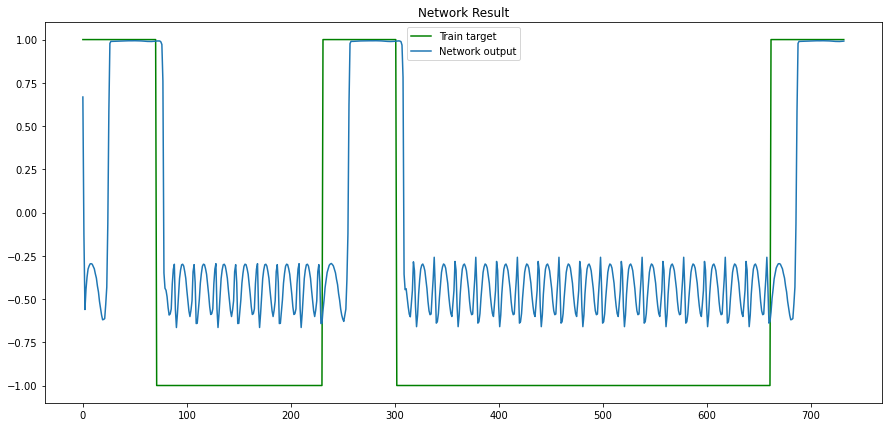

In [17]:
plt.figure(figsize=(15, 7))
plt.plot(T2.reshape(T2.shape[0]), color='green')
plt.plot(output2.reshape(output2.shape[0]))
plt.legend(['Train target', 'Network output'])
plt.title("Network Result")
plt.show()

Предсказанные значения:

In [18]:
output[output >= 0] = 1.0
output[output < 0] = -1.0

MSE = mean_squared_error(T, output)
print('MSE = {}'.format(MSE))
print('RMSE = {}'.format(np.sqrt(MSE)))

MSE = 0.8388520971302428
RMSE = 0.9158886925441556


### Задание №2

Использовать *сеть Хопфилда* для распознавания статических образов.

Формируем входные данные для *сети Хопфилда*

Цветам точек соответствуют 0 и 1.

In [19]:
zero = np.matrix([
               0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
               0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
               0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
               0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
               0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
               0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
               0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
               0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
               0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
               0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
               0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
       
one = np.matrix([
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0])
       
two = np.matrix([
                1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
                1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
                0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
                0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
                0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
                1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
                1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
                1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
                1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
                1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
                1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
                1, 1, 1, 1, 1, 1, 1, 1, 0, 0])
    
three = np.matrix([
                0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
                0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
                0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
                0, 0, 1, 1, 1, 1, 1, 1, 0, 0])
       
four = np.matrix([
                0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
                0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
                0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
                0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
                0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
                0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
                0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

six = np.matrix([
                1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
                1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
                1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
                1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
                1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
                1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
                1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
                1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
                1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
                1, 1, 1, 1, 1, 1, 0, 0, 0, 0])
       
nine = np.matrix([
                0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
                0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
                0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
                0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
                0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
                0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
                0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
                0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
                0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
                0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
                0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
                0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [20]:
data = np.concatenate([two, one, six], axis=0)

hopf = algorithms.DiscreteHopfieldNetwork(mode='async', n_times=600)
hopf.train(data)

In [21]:
result = hopf.predict(two)

In [22]:
def draw_image(img):
    for row in img.tolist():
        print(' '.join(' #'[val] for val in row))

In [23]:
draw_image(two.reshape(12,10))

# # # # # # # #    
# # # # # # # #    
            # #    
            # #    
            # #    
# # # # # # # #    
# # # # # # # #    
# #                
# #                
# #                
# # # # # # # #    
# # # # # # # #    


Результат коррекции сети:

In [24]:
draw_image(result.reshape(12, 10))

# # # # # # # #    
# # # # # # # #    
            # #    
            # #    
            # #    
# # # # # # # #    
# # # # # # # #    
# #                
# #                
# #                
# # # # # # # #    
# # # # # # # #    


In [25]:
def make_noise(img, noise_percent):
    limit = img.shape[1]
    tmp = img.T
    
    for i in range(noise_percent):
        pos = np.random.randint(1, limit, 1)[0]
        tmp[pos] *= 0
    res = tmp.T
    return res

Зашумление второго образа на 20%:

In [26]:
noise_one = make_noise(one, 20)
draw_image(noise_one.reshape(12, 10))

      # # # #      
      # # #        
          # #      
      #   # #      
      # #   #      
        # # #      
      # # # #      
          # #      
      # #   #      
      # # # #      
      # # # #      
      # # #        


Результат коррекции сети:

In [27]:
result = hopf.predict(noise_one)
draw_image(result.reshape(12, 10))

      # # # #      
      # # # #      
        # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      


Зашумление третьего образа на 30%:

In [28]:
noise_six = make_noise(six, 30)
draw_image(noise_six.reshape(12, 10))

#       #          
# # # # # #        
#                  
#                  
  # # # #          
  # # # # #        
#       #          
  #     # #        
# #                
# #     # #        
# # # # #          
  # #   # #        


Результат коррекции сети:

In [29]:
result = hopf.predict(noise_six)
draw_image(result.reshape(12, 10))

# # # # # #        
# # # # # #        
#                  
#                  
# # # # # #        
# # # # # #        
# #     # #        
# #     # #        
# #     # #        
# #     # #        
# # # # # #        
# # # # # #        


### Задание №3

Использовать *сеть Хэмминга* для распознавания статических образов.

Формируем входные данные для *сети Хэмминга*.

Цветам точек соответствуют -1 и 1.

In [30]:
zero = np.array([
               -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
               -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
               -1, -1, 1, 1, 1, 1, 1, 1, -1, -1,
               -1, 1, 1, 1, -1, -1, 1, 1, 1, -1,
               -1, 1, 1, 1, -1, -1, 1, 1, 1, -1,
               -1, 1, 1, 1, -1, -1, 1, 1, 1, -1,
               -1, 1, 1, 1, -1, -1, 1, 1, 1, -1,
               -1, 1, 1, 1, -1, -1, 1, 1, 1, -1,
               -1, 1, 1, 1, -1, -1, 1, 1, 1, -1,
               -1, -1, 1, 1, 1, 1, 1, 1, -1, -1,
               -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
               -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])
       
one = np.array([
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1])
       
two = np.array([
                1, 1, 1, 1, 1, 1, 1, 1, -1, -1,
                1, 1, 1, 1, 1, 1, 1, 1, -1, -1,
                -1, -1, -1, -1, -1, -1, 1, 1, -1, -1,
                -1, -1, -1, -1, -1, -1, 1, 1, -1, -1,
                -1, -1, -1, -1, -1, -1, 1, 1, -1, -1,
                1, 1, 1, 1, 1, 1, 1, 1, -1, -1,
                1, 1, 1, 1, 1, 1, 1, 1, -1, -1,
                1, 1, -1, -1, -1, -1, -1, -1, -1, -1,
                1, 1, -1, -1, -1, -1, -1, -1, -1, -1,
                1, 1, -1, -1, -1, -1, -1, -1, -1, -1,
                1, 1, 1, 1, 1, 1, 1, 1, -1, -1,
                1, 1, 1, 1, 1, 1, 1, 1, -1, -1])
    
three = np.array([
                -1, -1, 1, 1, 1, 1, 1, 1, -1, -1,
                -1, -1, 1, 1, 1, 1, 1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, 1, 1, 1, 1, -1, -1,
                -1, -1, -1, -1, 1, 1, 1, 1, -1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, 1, 1, 1, 1, 1, 1, 1, -1,
                -1, -1, 1, 1, 1, 1, 1, 1, -1, -1])
       
four = np.array([
                -1, 1, 1, -1, -1, -1, -1, 1, 1, -1,
                -1, 1, 1, -1, -1, -1, -1, 1, 1, -1,
                -1, 1, 1, -1, -1, -1, -1, 1, 1, -1,
                -1, 1, 1, -1, -1, -1, -1, 1, 1, -1,
                -1, 1, 1, -1, -1, -1, -1, 1, 1, -1,
                -1, 1, 1, 1, 1, 1, 1, 1, 1, -1,
                -1, 1, 1, 1, 1, 1, 1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1])

six = np.array([
                1, 1, 1, 1, 1, 1, -1, -1, -1, -1,
                1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1,
                1, -1, -1, -1, -1, -1, -1, -1, -1, 1,
                1, -1, -1, -1, -1, -1, -1, -1, -1,
                1, 1, 1, 1, 1, 1, -1, -1, -1, -1,
                1, 1, 1, 1, 1, 1, -1, -1, -1, -1,
                1, 1, -1, -1, 1, 1, -1, -1, -1, -1,
                1, 1, -1, -1, 1, 1, -1, -1, -1, -1,
                1, 1, -1, -1, 1, 1, -1, -1, -1, -1,
                1, 1, -1, -1, 1, 1, -1, -1, -1, -1,
                1, 1, 1, 1, 1, 1, -1, -1, -1, -1,
                1, 1, 1, 1, 1, 1, -1, -1, -1, -1])
       
nine = np.array([
                -1, -1, -1, -1, 1, 1, 1, 1, 1, 1,
                -1, -1, -1, -1, 1, 1, 1, 1, 1, 1,
                -1, -1, -1, -1, 1, 1, -1, -1, 1, 1,
                -1, -1, -1, -1, 1, 1, -1, -1, 1, 1,
                -1, -1, -1, -1, 1, 1, -1, -1, 1, 1,
                -1, -1, -1, -1, 1, 1, -1, -1, 1, 1,
                -1, -1, -1, -1, 1, 1, 1, 1, 1, 1,
                -1, -1, -1, -1, 1, 1, 1, 1, 1, 1,
                -1, -1, -1, -1, -1, -1, -1, -1, 1, 1,
                -1, -1, -1, -1, -1, -1, -1, -1, 1, 1,
                -1, -1, -1, -1, 1, 1, 1, 1, 1, 1,
                -1, -1, -1, -1, 1, 1, 1, 1, 1, 1])

Первый слой - *полносвязный*.

In [31]:
# Q - number of images
Q = 7
patterns = np.array([zero, one, two, three, four, six, nine])
nums = [0, 1, 2, 3, 4, 6, 9]
eps = 1 / (Q - 3)

# input shape
shape = 10 * 12

IW = np.array([zero.T, one.T, two.T, three.T, four.T, six.T, nine.T])
b = shape * np.ones((Q, 1))

a = np.zeros((Q, Q))
for i in range(Q):
    a[i] = IW[i] @ patterns[i] + b[i]
    
LW = np.eye(Q)
LW[LW == 0.0] = -eps

Для реализации второго слоя используем *сеть Хопфилда*.

In [32]:
network = nl.net.newhop(a, max_init=600)

network.layers[0].np['w'][:] = LW
network.layers[0].np['b'][:] = 0

In [33]:
A = IW @ two + b
A

array([[112., 132., 240., 168., 128., 168.,  96.],
       [112., 132., 240., 168., 128., 168.,  96.],
       [112., 132., 240., 168., 128., 168.,  96.],
       [112., 132., 240., 168., 128., 168.,  96.],
       [112., 132., 240., 168., 128., 168.,  96.],
       [112., 132., 240., 168., 128., 168.,  96.],
       [112., 132., 240., 168., 128., 168.,  96.]])

In [34]:
res = network.sim(A)

In [35]:
answer_class = np.argmax(res[0])
print('Result class: {}'.format(nums[answer_class]))

number = patterns[answer_class]
number[number == -1] = 0
draw_image(number.reshape(12, 10))

Result class: 2
# # # # # # # #    
# # # # # # # #    
            # #    
            # #    
            # #    
# # # # # # # #    
# # # # # # # #    
# #                
# #                
# #                
# # # # # # # #    
# # # # # # # #    


Второй образ зашумленный на 20%

In [36]:
noise_one = np.asarray(noise_one)[0]
noise_one[noise_one == 0] = -1
A = IW @ noise_one + b
res = network.sim(A)

answer_class = np.argmax(res[0])
print('Result class: {}'.format(nums[answer_class]))

number = patterns[answer_class]
number[number == -1] = 0
draw_image(number.reshape(12, 10))

Result class: 1
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      


Третий образ зашумленный на 30% 

In [37]:
noise_six = np.asarray(noise_six)[0]
noise_six[noise_six == 0.] = -1

A = IW @ noise_six + b

res = network.sim(A)

answer_class = np.argmax(res[0])
print('Result class: {}'.format(nums[answer_class]))

number = patterns[answer_class]
number[number == -1] = 0
draw_image(number.reshape(12, 10))

Result class: 6
# # # # # #        
# # # # # #        
# #                
# #                
# # # # # #        
# # # # # #        
# #     # #        
# #     # #        
# #     # #        
# #     # #        
# # # # # #        
# # # # # #        


# Выводы
Самой интересным заданием с интересным результатом для меня представляется первое. По выходу сети можно заметить, что она не только смотрит немного назад, но и пытается при обучении запомнить расстояние между сигналами. Когда сигнала долго нет, выход сети начинает сходить с ума и расти, хотя входной сигнал не изменился.